<span style="color:Purple"># Logistic Regression</span>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

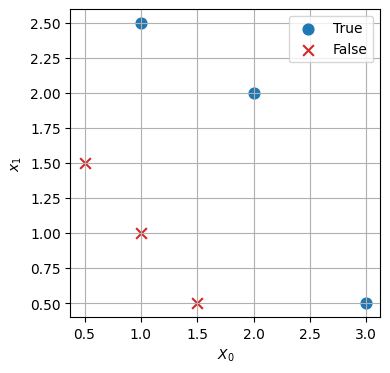

In [17]:
# just drawing out the data for visualisation
mask0=(y_train==0)
plt.figure(figsize=(4,4))
plt.scatter(X_train[~mask0,0],X_train[~mask0,1],marker="o",label="True",color="tab:blue",s=60)
plt.scatter(X_train[mask0,0],X_train[mask0,1],marker="x",label="False",color="tab:red",s=60)
plt.legend()
plt.xlabel("$X_0$");plt.ylabel("$x_1$");plt.grid(True)
plt.show()

## For plotting what did we do?<br>
For plotting we need to identify all the rows with either false values for true values so we used<br><br>
 **masked values (either 0 or 1)**
 <br>
### What does it do?
Creates array for eg: for y=[0,0,1] creates masked(y==1)=[false, false, true] which can be used for indexing  for separate labels for distinction like "x_train[masked,1]" gives all rows with "true y values" and second column and then by calling plot twice we give different figures!

## Gradient Descent

What we do here is find change for w and b for w we find change in each column and return it just like in linear regression

In [13]:
def compute_gradient_logistic(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        z=np.dot(w,x[i])+b
        f_wb=1/(1+np.exp(-z))
        err=f_wb-y[i]
        for j in range(n):
            dj_dw[j]+=(err*x[i,j])
        dj_db+=err
    dj_dw/=m
    dj_db/=m
    return dj_db,dj_dw
            



## Gradient Descent Algorithm
<br>In supervised learning there is always two functions calling each other:<br>
 - Gradient descent that actually changes the values for w and b and<br>
- computing gradient which gives changes and then from certain iteration in gradient descent gives the final equation and we can plot the cost if we wish for

In [7]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters):
    w=np.copy(w_in)
    b=b_in
    for i in range(num_iters):
        dj_db,dj_dw=compute_gradient_logistic(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
    return w,b

## Now the implemention:

In [16]:
w_tmp=np.zeros_like(X_train[0])
b_tmp=0.
alpha=0.1
iters=10000
w_out,b_out=gradient_descent(X_train,y_train,w_tmp,b_tmp,alpha,iters)
print(f"w:{w_out}\nb:{b_out}")


w:[5.28123029 5.07815608]
b:-14.222409982019837


## We show plot with the decision boundary
<br> For this we know:w1x1+w2x2+...+wnxn=0<br>
But to plot we need two points in the axis so we find x-intercept and y-intercept. Where we have one w for each row/axes!

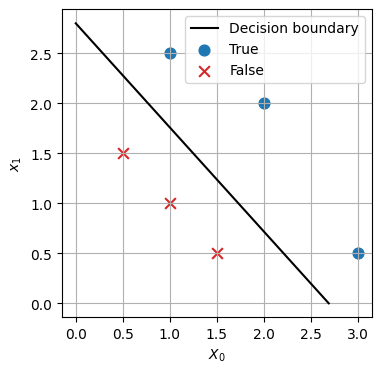

Decision line:-1.0*x+2.8


In [ ]:
mask0=(y_train==0)
#x0=x-intercpet and x1=y-intercept
x0=-b_out/w_out[0]
x1=-b_out/w_out[1]
plt.figure(figsize=(4,4))
plt.plot([x0,0],[0,x1],"k",label="Decision boundary")
plt.scatter(X_train[~mask0,0],X_train[~mask0,1],marker="o",label="True",color="tab:blue",s=60)
plt.scatter(X_train[mask0,0],X_train[mask0,1],marker="x",label="False",color="tab:red",s=60)
plt.legend()
plt.xlabel("$X_0$");plt.ylabel("$x_1$");plt.grid(True)
plt.show()
m_decision=(-x1/x0)
print(f"Decision line:{m_decision:.2}*x+{x1:.2}")

In [37]:
test=np.array([1.3,1.22])
z=np.dot(w_out,test)+b_out
prediction=1/(1+np.exp(-z))
print(f"Your probability is:{prediction:.2}")
decision_y=np.dot(m_decision,test)+x1
if(prediction>=0.5):
    print("Good probability of tumor!")
else:
    print("Might not be tumor!")



Your probability is:0.24
Might not be tumor!
